plot the likelihood function for slices of the parameter values

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy as sp
from scipy.io import mmread
import mpmath as mp
from scipy.optimize import minimize
import time
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [2]:
def negloglik(param, mat):
    alpha = param[0]
    c = param[1]
    sigma = param[2]
    Z = mat
    n = Z.shape[0] # number of rows
    exponent_vec = np.zeros(n)
    for i in range(1, n+1): # need to say 1, n+1 to get 1:n
        exponent_vec[i-1] = (mp.gamma(1 + c) * mp.gamma(i - 1 + c + sigma)) / (mp.gamma(i + c) * mp.gamma(c + sigma))
    m = np.asarray(Z.sum(axis=0)).flatten().astype(int)  # sum of columns
    K = len(m)
    prod_vec = (sp.special.loggamma(m - sigma) + sp.special.loggamma(n - m + c + sigma) + sp.special.loggamma(1 + c)) - (sp.special.loggamma(1 - sigma) + sp.special.loggamma(c + sigma) + sp.special.loggamma(n + c))
    loglikelihood = (-alpha * sum(exponent_vec)) + sum(prod_vec) + K* np.log(alpha)
    return(np.real(-loglikelihood))

In [4]:
cons = ({'type': 'ineq', 'fun': lambda x: x[1] + x[2]})

In [5]:
name = 'alt.atheism'

In [6]:
newsgroups_train = fetch_20newsgroups(subset='train', categories=[name])
vectors = vectorizer.fit_transform(newsgroups_train.data)
test_mat = vectors
test_mat.data = np.ones(test_mat.data.size)

In [7]:
newsgroups_train.filenames.size

480

alpha change for alt.atheism documents

In [8]:
like_vec = []
alpha_vec = np.arange(120,260)
for alpha in alpha_vec:
    param = [alpha, 4, 0.5]
    value = negloglik(param,test_mat)
    like_vec.append(value)

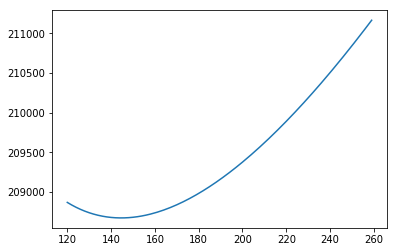

In [9]:
plt.plot(alpha_vec,like_vec)

c change for atheism docs

In [10]:
like_vec = []
c_vec = np.arange(3,5,0.05)
for c in c_vec:
    param = [130, c, 0.5]
    value = negloglik(param,test_mat)
    like_vec.append(value)

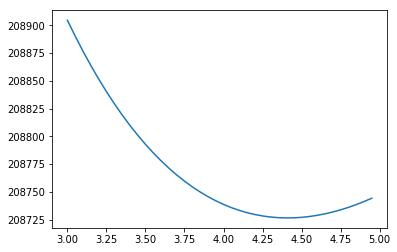

In [11]:
plt.plot(c_vec,like_vec)

sigma change for atheism

In [12]:
like_vec = []
sig_vec = np.arange(0.3,0.7
                    ,0.01)
for sig in sig_vec:
    param = [130, 5, sig]
    value = negloglik(param,test_mat)
    like_vec.append(value)

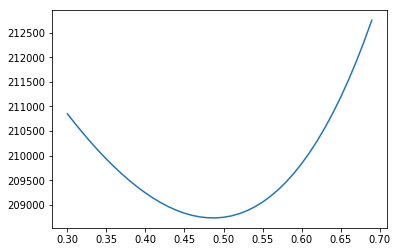

In [13]:
plt.plot(sig_vec,like_vec)

In [10]:
nips_mat = mmread("../data/nipspapersmatrix.mtx")
nips_mat.data = np.ones(nips_mat.data.size) # change all non-zero values to 1

sigma change for neurips

In [16]:
like_vec = []
sig_vec = np.arange(0.6,0.95
                    ,0.01)
for sig in sig_vec:
    param = [130, 5, sig]
    value = negloglik(param,nips_mat)
    like_vec.append(value)

In [17]:
col_sums= np.asarray(nips_mat.sum(axis=0)).flatten().astype(int)

In [18]:
sum(col_sums==1)/col_sums.size

0.7164995837111915

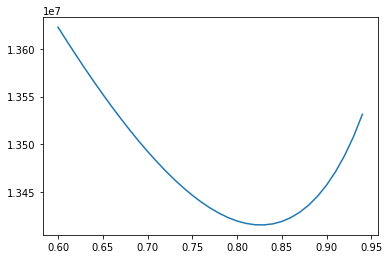

In [19]:
plt.plot(sig_vec,like_vec)

alpha change for neurips

In [20]:
like_vec = []
alpha_vec = np.arange(100,400,10)
for alpha in alpha_vec:
    param = [alpha, 4, 0.7]
    value = negloglik(param,nips_mat)
    like_vec.append(value)

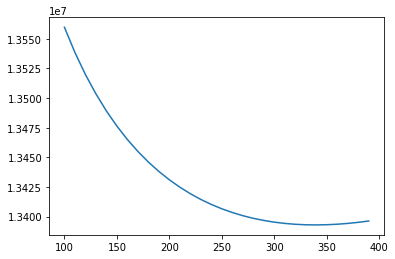

In [21]:
plt.plot(alpha_vec,like_vec)

c change for nips

In [22]:
like_vec = []
c_vec = np.arange(7,10,0.05)
for c in c_vec:
    param = [260, c, 0.7]
    value = negloglik(param,nips_mat)
    like_vec.append(value)

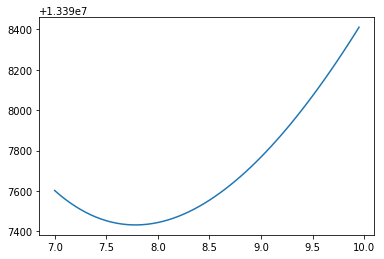

In [23]:
plt.plot(c_vec,like_vec)

In [25]:
sum(nips_mat.data)/5806

899.669135377196

In [3]:
def negloglik(param, mat):
    alpha = param[0]
    c = param[1]
    sigma = param[2]
    Z = mat
    n = Z.shape[0] # number of rows
    exponent_vec = np.zeros(n)
    for i in range(1, n+1): # need to say 1, n+1 to get 1:n
        exponent_vec[i-1] = (mp.gamma(1 + c) * mp.gamma(i - 1 + c + sigma)) / (mp.gamma(i + c) * mp.gamma(c + sigma))
    m = np.asarray(Z.sum(axis=0)).flatten().astype(int)  # sum of columns
    K = len(m)
    prod_vec = (sp.special.loggamma(m - sigma) + sp.special.loggamma(n - m + c + sigma) + sp.special.loggamma(1 + c)) - (sp.special.loggamma(1 - sigma) + sp.special.loggamma(c + sigma) + sp.special.loggamma(n + c))
    loglikelihood = (-alpha * sum(exponent_vec)) + sum(prod_vec) + K* np.log(alpha)

    return(np.real(-loglikelihood))

In [4]:
def negloglik_alpha(alpha,param, mat):
    c = param[0]
    sigma = param[1]
    Z = mat
    np_gamma=np.frompyfunc(mp.gamma,1,1)
    n = Z.shape[0] # number of rows
    exponent_vec = np.zeros(n)
    for i in range(1, n+1): # need to say 1, n+1 to get 1:n
        exponent_vec[i-1] = (np_gamma(1 + c) * np_gamma(i - 1 + c + sigma)) / (np_gamma(i + c) * np_gamma(c + sigma))
    m = np.asarray(Z.sum(axis=0)).flatten().astype(int)  # sum of columns
    K = len(m)
    np_exp = np.dtype('float32').type(sum(exponent_vec))
    prod_vec = (sp.special.loggamma(m - sigma) + sp.special.loggamma(n - m + c + sigma) + sp.special.loggamma(1 + c)) - (sp.special.loggamma(1 - sigma) + sp.special.loggamma(c + sigma) + sp.special.loggamma(n + c))
    loglikelihood = (-alpha * np_exp) + sum(prod_vec) + K* np.log(alpha)
    return(np.real(-loglikelihood)-200000)

In [5]:
def negloglik_c(c,param, mat):
    alpha = param[0]
    sigma = param[1]
    np_gamma=np.frompyfunc(mp.gamma,1,1)
    c=np.dtype('float32').type(c)
    Z = mat
    n = Z.shape[0] # number of rows
    exponent_vec = np.zeros(n)
    for i in range(1, n+1): # need to say 1, n+1 to get 1:n
        exponent_vec[i-1] = (np_gamma(1 + c) * np_gamma(i - 1 + c + sigma)) / (np_gamma(i + c) * np_gamma(c + sigma))
    m = np.asarray(Z.sum(axis=0)).flatten().astype(int)  # sum of columns
    K = len(m)
    np_exp = np.dtype('float32').type(sum(exponent_vec))
    prod_vec = (sp.special.loggamma(m - sigma) + sp.special.loggamma(n - m + c + sigma) + sp.special.loggamma(1 + c)) - (sp.special.loggamma(1 - sigma) + sp.special.loggamma(c + sigma) + sp.special.loggamma(n + c))
    loglikelihood = (-alpha * np_exp) + sum(prod_vec) + K* np.log(alpha)
    
    return(float(np.real(-loglikelihood)-200000-13203046-6000))

In [6]:
def negloglik_sig(sigma,param, mat):
    alpha = param[0]
    c = param[1]
    np_gamma=np.frompyfunc(mp.gamma,1,1)
    Z = mat
    n = Z.shape[0] # number of rows
    exponent_vec = np.zeros(n)
    for i in range(1, n+1): # need to say 1, n+1 to get 1:n
        exponent_vec[i-1] = (np_gamma(1 + c) * np_gamma(i - 1 + c + sigma)) / (np_gamma(i + c) * np_gamma(c + sigma))
    m = np.asarray(Z.sum(axis=0)).flatten().astype(int)  # sum of columns
    K = len(m)
    np_exp = np.dtype('float32').type(sum(exponent_vec))
    prod_vec = (sp.special.loggamma(m - sigma) + sp.special.loggamma(n - m + c + sigma) + sp.special.loggamma(1 + c)) - (sp.special.loggamma(1 - sigma) + sp.special.loggamma(c + sigma) + sp.special.loggamma(n + c))
    loglikelihood = (-alpha * np_exp) + sum(prod_vec) + K* np.log(alpha)
    
    return(np.real(-loglikelihood)-200000)

In [8]:
@np.vectorize
def negloglik_c_sig(c,sig,alpha, mat):
    sigma = sig
    np_gamma=np.frompyfunc(mp.gamma,1,1)
    Z = mat
    n = Z.shape[0] # number of rows
    exponent_vec = np.zeros(n)
    for i in range(1, n+1): # need to say 1, n+1 to get 1:n
        exponent_vec[i-1] = (np_gamma(1 + c) * np_gamma(i - 1 + c + sigma)) / (np_gamma(i + c) * np_gamma(c + sigma))
    m = np.asarray(Z.sum(axis=0)).flatten().astype(int)  # sum of columns
    K = len(m)
    np_exp = np.dtype('float32').type(sum(exponent_vec))
    prod_vec = (sp.special.loggamma(m - sigma) + sp.special.loggamma(n - m + c + sigma) + sp.special.loggamma(1 + c)) - (sp.special.loggamma(1 - sigma) + sp.special.loggamma(c + sigma) + sp.special.loggamma(n + c))
    loglikelihood = (-alpha * np_exp) + sum(prod_vec) + K* np.log(alpha)
    
    return(np.real(-loglikelihood)-200000)

# writing my own optimizer for neurips dataset

In [45]:
X, Y = np.mgrid[0.5:1.5:5j, 0.05:0.15:5j]

In [46]:
start=time.time()
res = negloglik_c_sig(X,Y,250,nips_mat)
elapsed = time.time() - start

In [47]:
elapsed

21.895667552947998

In [48]:
ind = np.unravel_index(np.argmin(res,axis=None),res.shape)

In [74]:
ind

(4, 4)

In [77]:
X[4,4],Y[4,4]

(1.5, 0.15)

In [78]:
negloglik_c_sig(1.5,0.15,250,nips_mat)

array(14359391.71629906)

In [96]:
def ibp_coordinate_optimizer(mat,initial, tol):
    bar = tol+1
    alpha = initial[0]
    c = initial[1]
    sigma = initial[2]
    iter=1
    new_value = 0
    counter=0
    while(bar>tol or counter<5):
        # coordinate ascent
        print(iter)
        result_alpha = minimize(negloglik_alpha, x0 = alpha, args=([c,sigma], mat))
        alpha = float(result_alpha.x)
        C,Sig = np.mgrid[-0.7:c/2:11j,sigma/2:3/2*sigma:3j]
        loglik_grid = negloglik_c_sig(C,Sig,alpha,mat)
        ind= np.unravel_index(np.argmin(loglik_grid, axis=None),loglik_grid.shape)
        c, sigma = C[ind], Sig[ind]
        print(alpha,c,sigma)
        iter +=1
        initial = new_value
        new_value = np.min(loglik_grid)
        bar = abs(initial - new_value)
        if bar<tol:
            counter +=1
        else:
            counter =0
        
    return([alpha,c,sigma,new_value])
        

In [99]:
negloglik(mat=nips_mat,param=[622.22,-0.7,0.0234])-200000

nan

In [81]:
result

[245.3942961114165, 0.7119140625, 0.8, 13199801.054569583]

In [84]:
result

[336.11653012883437,
 0.7998564640000002,
 0.7529536000000003,
 13192882.384527525]

In [89]:
result

[352.71568645490197, 0.6771200000000002, 0.75, 13192507.751257898]

In [92]:
result

[360.5745792860946, 0.5981972000000001, 0.75, 13192431.443001505]

In [12]:
result

[367.0039802030637, 0.5283928, 0.75, 13192375.296586035]

In [15]:
result

[373.0437742467291, 0.46830800000000006, 0.75, 13192327.288435949]

In [18]:
result

[389.789484619099, 0.32423879709632003, 0.75, 13192214.548798544]

In [27]:
result

[405.652153293369, 0.20696505401344004, 0.75, 13192130.182693884]

In [29]:
result

[419.6789451409966, 0.12278688777216, 0.75, 13192069.897575233]

In [35]:
result

[431.2226941938688, 0.065367243, 0.75, 13192028.682189606]

In [39]:
result

[438.07555013591957, 0.034756241400000006, 0.75, 13192007.788239846]

In [41]:
result

[441.91958880403865, 0.018441002700000004, 0.75, 13191997.137943517]

In [78]:
result_alpha = minimize(negloglik_alpha, x0 = 441.9, args=([-0.4,0.75], nips_mat))

In [79]:
result_alpha

      fun: 13191833.806808474
 hess_inv: array([[1.1619594]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([622.23610167])

In [75]:
result_alpha

      fun: 13191877.209317137
 hess_inv: array([[2.62878425]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 8
     njev: 12
   status: 0
  success: True
        x: array([744.13861266])

In [47]:
result

[446.45309711626066, 0.0, 0.75, 13191985.532890728]

In [77]:
result

[744.1898051021864, -0.5, 0.75, 13191877.210027253]

In [21]:
like_vec = []
c_vec = np.arange(-0.6,-0.2,0.01)
for c in c_vec:
    result_alpha = minimize(negloglik_alpha, x0 = 600, args=([c,0.71], nips_mat))
    alpha = float(result_alpha.x)
    value = result_alpha.fun
    #value = negloglik(param,nips_mat)
    like_vec.append(value)
    print(c, alpha, value)

-0.6 1885.0020743597936 13191008.30944496
-0.59 1765.9169631532607 13190894.156689223
-0.58 1664.4723623563434 13190798.223770266
-0.57 1577.6077375819723 13190716.66734199
-0.5599999999999999 1501.9710858730946 13190646.6450351
-0.5499999999999999 1435.4938586111698 13190585.957517095
-0.5399999999999999 1376.8091162123692 13190533.020566178
-0.5299999999999999 1324.765926656282 13190486.512100227
-0.5199999999999999 1277.4041224280297 13190445.448257588
-0.5099999999999999 1235.2767648714419 13190409.016199308
-0.4999999999999999 1196.5177126062038 13190376.549029928
-0.4899999999999999 1161.8484097404853 13190347.486345401
-0.47999999999999987 1129.803132782852 13190321.445037298
-0.46999999999999986 1100.04442430891 13190298.052720007
-0.45999999999999985 1073.1082247737932 13190276.93517801
-0.44999999999999984 1047.9070338772738 13190257.868627366
-0.43999999999999984 1024.1016217945228 13190240.660916641
-0.4299999999999998 1002.4261164584966 13190225.06567531
-0.419999999999999

In [16]:
result_alpha = minimize(negloglik_alpha, x0 = 600, args=([-0.38,0.71], nips_mat))

In [17]:
result_alpha

      fun: 13190166.557311451
 hess_inv: array([[2.59354567]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([912.68031998])

In [19]:
negloglik_alpha(alpha=605,param=[-0.38,0.75], mat=nips_mat)

13191832.933754725

In [115]:
c_vec_new = np.linspace(-0.7,-0.19,51)

In [114]:
len(like_vec)

51

In [119]:
result_alpha = minimize(negloglik_alpha, x0 = 600, args=([-0.38,0.75], nips_mat))

In [120]:
result_alpha # for sigma -0.75

      fun: 13191832.849480813
 hess_inv: array([[1.11832593]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([605.48330373])

could it be 605, -0.38, 0.75?